This notebook is the second part of the Tianchi Competition challenge, focused on **Feature Engineering**, followed after the previous notebook on **Exploratory Data Analysis**.

These two steps in general are closely related as EDA is used to discover some characteristics of the data and the relationships, which is very helpful for the subsequent feature construction.


The preliminary analysis of the data *( .head( ), or statistical functions such as .sum( ), .mean( ), .descirbe( ) )* can be from: the number of samples, the number of training sets, whether there exists time/date feature, whether it is a time-series problem, the meaning of the feature (non-anonymous feature), the type of the feature (char, str, int, float, time), the absence of the feature (missing types: empty or "NAN",etc), the mean variance...

For **missing values**: it is important to note that different methods should be applied to the dataset according to a collection of factors such as the proportion of missing values, the importance of the feature, etc.

Possible methods include the filling method, (mean filling, 0 filling, mode filling, etc.) 

Can also discard, or use different tree models like Xgboost to predict.


For **outliers**: analyze whether the anomaly is an outlier (far from the mean or a special symbol), whether the outliers should be discarded, or filled with normal values, etc.

The first step is always data exploration and cleaning, which involves changing data types and removing or imputing missing values. With an understanding of the data gained through exploration, it can be prepared in such a way that it is useful for the model. 

This may include removing outliers or specific redundant features; as well as creating features from the data that better represent the underlying problem, facilitating the machine learning process and resulting in improved model accuracy.

For **Feature Engineering**:

- Anomaly Detection (Missing Values + Outliers)
- Normalization / Standardization
- Data Binning
- Feature Creation and Transformation
- Dimension Reduction
- Feature Selection

In [23]:
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
import time

#warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
Train_data = pd.read_csv('./data/used_car_train_20200313.csv', sep=' ')
TestA_data = pd.read_csv('./data/used_car_testA_20200313.csv', sep=' ')

print('Train data shape:',Train_data.shape)
print('TestA data shape:',TestA_data.shape)

Train data shape: (150000, 31)
TestA data shape: (50000, 30)


In [25]:
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [26]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [27]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [28]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [29]:
TestA_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')

When doing feature engineering, good way would be concatenate the training data and test data, so that just need to do one time feature engineering

In [30]:
Train_data['train']=1
TestA_data['train']=0
data = pd.concat([Train_data, TestA_data], ignore_index=True)

In [31]:
data.columns

Index(['SaleID', 'bodyType', 'brand', 'creatDate', 'fuelType', 'gearbox',
       'kilometer', 'model', 'name', 'notRepairedDamage', 'offerType', 'power',
       'price', 'regDate', 'regionCode', 'seller', 'train', 'v_0', 'v_1',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5',
       'v_6', 'v_7', 'v_8', 'v_9'],
      dtype='object')

Below is an example of decomposing dates or timestamp variables into a variety of constituent parts, which allows models to discover and exploit relationships. 

In [32]:
# create new fetaure "used_time", in reverse relation with price
# data['creatDate'] - data['regDate']
# Caveat: the errors in the datetime format, set errors='coerce'
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [33]:
# the proportion of missing values is not small, cannot just delete
# here we temporary leave them for XGBoost tree models to handle
data['used_time'].isnull().sum()

15101

In [34]:
Train_data['regionCode'][:19]

0     1046
1     4366
2     2806
3      434
4     6977
5     3690
6     3073
7     4000
8     4679
9      302
10    1193
11    5709
12    2753
13    3203
14    3972
15    2869
16     419
17     207
18    1440
Name: regionCode, dtype: int64

In [35]:
# extract useful city info from regionCode, which is from Germany,
# an example of applying domain knowledge
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])

In [36]:
data.head(20)

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,...,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,used_time,city
0,0,1.0,6,20160404,0.0,0.0,12.5,30.0,736,0.0,...,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,4385.0,1
1,1,2.0,1,20160309,0.0,0.0,15.0,40.0,2262,-,...,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,4757.0,4
2,2,1.0,15,20160402,0.0,0.0,12.5,115.0,14874,0.0,...,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,4382.0,2
3,3,0.0,10,20160312,0.0,1.0,15.0,109.0,71865,0.0,...,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,7125.0,
4,4,1.0,5,20160313,0.0,0.0,5.0,110.0,111080,0.0,...,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,1531.0,6
5,5,0.0,10,20160319,1.0,0.0,10.0,24.0,137642,0.0,...,0.156615,-1.727217,-0.345690,0.260246,0.000518,0.119838,0.090922,0.048769,2482.0,3
6,6,0.0,4,20160317,0.0,1.0,15.0,13.0,2402,0.0,...,0.113311,1.644606,-1.270381,0.267998,0.117675,0.142334,0.025446,0.028174,6185.0,3
7,7,1.0,14,20160326,0.0,0.0,15.0,26.0,165346,0.0,...,-0.676693,1.942673,0.524206,0.239506,0.000000,0.122943,0.039839,0.082413,6108.0,4
8,8,2.0,1,20160326,1.0,1.0,15.0,19.0,2974,0.0,...,0.475333,0.556575,-1.262490,0.263833,0.116583,0.144255,0.039851,0.024388,4798.0,4
9,9,5.0,7,20160402,0.0,0.0,15.0,7.0,82021,0.0,...,-2.201545,3.096861,0.843852,0.262473,0.068267,0.012176,0.010291,0.098727,6666.0,


### Data binning

also can apply to features with missing values, all missing values can be in one data_bin.

Why data binning? 
- Faster and scalable computation
- Features are more robust to outliers and missing values
- Models stablize and generalization improves
- Introduces non-linearlity


In [37]:
# using power feature as an example 
bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head(20)

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68
5,10.0,109
6,14.0,150
7,10.0,101
8,17.0,179
9,8.0,88


In [39]:
# discard redundant features
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [40]:
print(data.shape)
data.columns

(200000, 32)


Index(['SaleID', 'bodyType', 'brand', 'fuelType', 'gearbox', 'kilometer',
       'model', 'name', 'notRepairedDamage', 'offerType', 'power', 'price',
       'seller', 'train', 'v_0', 'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
       'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'used_time',
       'city', 'power_bin'],
      dtype='object')

In [41]:
# save one data for tree models(xgboost)
# data.to_csv('data_for_tree.csv', index=0)

The data for the linear model is more complex than the data for the tree model. 

Because, first of all, some tree models can handle NaN values automatically. Therefore, the above data is not processed for NaN value.

In addition, the data used by the tree model does not need to be normalized and standardized, nor does it need to be one-hot encoded.

Explainations: 

"The tree model does not need gradient descent to find the optimal solution. It is concerned with the probability distribution of the variable rather than the value of the variable, so normalization is not required."

"Because tree model splits and selects features based on the degree of uncertainty or calculates information gain(Gini Index / Entropy), so it calculates appropriate split points for each feature. This kind of dimension has little effect on tree splitting, though it will converge faster after normalization."


Below are the extra processes for feature engineering for linear models.

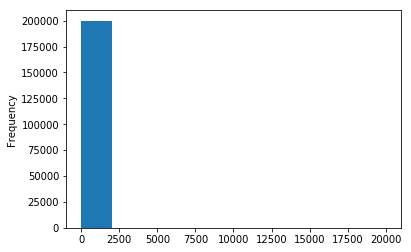

In [42]:
# look at the distribution of power variable
data['power'].plot.hist()

If using Linear models, the data needs to have normal distribution, here we need to apply log transform in order to get normal distribution.

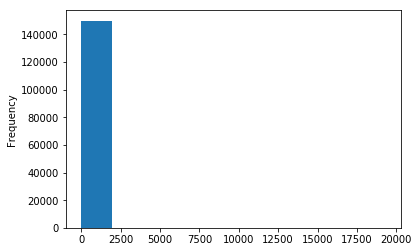

In [43]:
Train_data['power'].plot.hist()

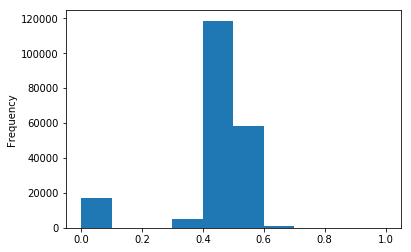

In [44]:
# first log transform, then normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

data['power'] = np.log(data['power'] + 1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

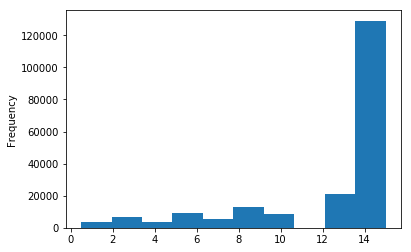

In [45]:
data['kilometer'].plot.hist()

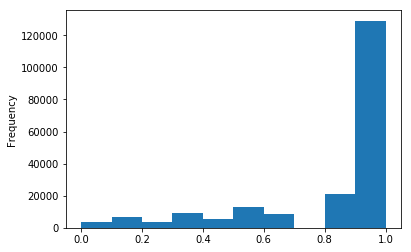

In [46]:
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [47]:
# one hot encoding categorical features
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 
                                     'fuelType','gearbox', 
                                     'notRepairedDamage', 'power_bin'])

In [48]:
print(data.shape)
data.columns

(200000, 363)


Index(['SaleID', 'kilometer', 'name', 'offerType', 'power', 'price', 'seller',
       'train', 'v_0', 'v_1',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=363)

In [49]:
# now the data is good for linear models
# data.to_csv('data_for_lr.csv', index=0)

**Feature selection**

Rank or score features based on a number of methods so that the least significant features can be removed. In general, the features are chosen from two perspectives; feature divergence and correlations between features and the dependent variable (the value being predicted). Some models have built-in feature selections, that aim to reduce or discount features as part of the model building process, for example LASSO Regression.

1. Filter

In [50]:
# correlation
print(data['power'].corr(data['price'], method='spearman'))
print(data['kilometer'].corr(data['price'], method='spearman'))
#print(data['brand_amount'].corr(data['price'], method='spearman'))
#print(data['brand_price_average'].corr(data['price'], method='spearman'))
#print(data['brand_price_max'].corr(data['price'], method='spearman'))
#print(data['brand_price_median'].corr(data['price'], method='spearman'))

0.5773425426332196
-0.4097783640876424


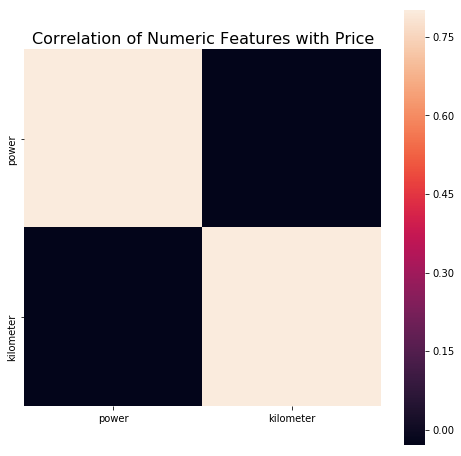

In [54]:
data_numeric = data[['power', 'kilometer']]
                     #'brand_amount', 'brand_price_average', 
                     #'brand_price_max', 'brand_price_median']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (8,8))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

2. Wrapper

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

x = data.drop(['price'], axis=1)
x = x.fillna(0)
y = data['price']
sfs.fit(x, y)
sfs.k_feature_names_ 

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

3. Embedding

The Embedding method, like the Wrapper method, also uses machine learning to select features. But the difference is that it is not trained by constantly filtering out features, the entire process uses the full set of features.

The most commonly used is to select features using L1 and L2 regularization. 

When the regularization penalty term increase to a certain level, some feature coefficients will approximate 0. We will find that some of the feature coefficients will be easier to become 0 first, and this part of the features can be discarded. That is, we choose the feature with a larger feature coefficient. 

It is also possible to use **decision trees** or **GBDT** to select features. 

In general, the features that are closer to the root are more important and should be retained.